In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, locally_linear_embedding
from umap import UMAP
from numpy.linalg import eig

from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

###  Steps for Data
- load in data
- Pre-Process and Clean data
- Scale Variables
- Dimensionality reduction (kernelPCA, PCA, t-SNE, Umap)
- Clustering


In [162]:
data_location = 'C:/Users/nuke2/Desktop/Python/Projects/Data/SaltyBetter/salty_data_complete.csv' # Sam

df = pd.read_csv(data_location, usecols = ["id", "best_streak", "elo", "tier", "tier_elo", "average_bet", "total_matches",
                                                      "win_rate", "match_format", "match_tier", "winner_binary", "id_other", "best_streak_other",
                                                      "elo_other", "tier_other", "tier_elo_other", "average_bet_other", "total_matches_other", "win_rate_other"])

df.head()

id  best_streak   elo tier  tier_elo  average_bet  total_matches  \
0  804            5  1560    S      1559  10870713.45             44   
1  804            5  1560    S      1559  10870713.45             44   
2  804            5  1560    S      1559  10870713.45             44   
3  804            5  1560    S      1559  10870713.45             44   
4  804            5  1560    S      1559  10870713.45             44   

   win_rate match_format match_tier  winner_binary  id_other  \
0      0.61  matchmaking          S            0.0     803.0   
1      0.61  matchmaking          S            0.0     884.0   
2      0.61  matchmaking          S            1.0    6375.0   
3      0.61  matchmaking          S            1.0     769.0   
4      0.61  matchmaking          S            0.0    1490.0   

   best_streak_other  elo_other tier_other  tier_elo_other  average_bet_other  \
0                2.0     1338.0          S          1338.0         4979841.32   
1               14.0     1544.0          S          1433.0         4989952.13   
2               14.0     1702.0          S          1699.0        18188514.31   
3                9.0     1623.0          S          1620.0         8723817.10   
4                6.0     1587.0          S          1586.0         7656194.80   

   total_matches_other  win_rate_other  
0                 37.0            0.27  
1                 39.0            0.64  
2                 42.0            0.79  
3                 50.0            0.70  
4                 55.0            0.64

## Data Cleaning and Pre-Processing

In [163]:
# mapping categorical variables

In [164]:
lett_to_numb = {'S': 1, 'A': 2, 'B': 3, 'P': 4, 'X': 0} 
# P < B < A < S < X or is X its own thing
match_form = {"matchmaking": 0, "tournament": 1}

df["match_format"] = df["match_format"].map(match_form)

In [165]:
np.mean((df[df['match_tier']=='X']).average_bet)

10157017.148764558

In [166]:
np.mean(df[df['match_tier']=='S'].average_bet)

8500015.363896074

In [167]:
df.head()

id  best_streak   elo tier  tier_elo  average_bet  total_matches  \
0  804            5  1560    S      1559  10870713.45             44   
1  804            5  1560    S      1559  10870713.45             44   
2  804            5  1560    S      1559  10870713.45             44   
3  804            5  1560    S      1559  10870713.45             44   
4  804            5  1560    S      1559  10870713.45             44   

   win_rate  match_format match_tier  winner_binary  id_other  \
0      0.61             0          S            0.0     803.0   
1      0.61             0          S            0.0     884.0   
2      0.61             0          S            1.0    6375.0   
3      0.61             0          S            1.0     769.0   
4      0.61             0          S            0.0    1490.0   

   best_streak_other  elo_other tier_other  tier_elo_other  average_bet_other  \
0                2.0     1338.0          S          1338.0         4979841.32   
1               14.0     1544.0          S          1433.0         4989952.13   
2               14.0     1702.0          S          1699.0        18188514.31   
3                9.0     1623.0          S          1620.0         8723817.10   
4                6.0     1587.0          S          1586.0         7656194.80   

   total_matches_other  win_rate_other  
0                 37.0            0.27  
1                 39.0            0.64  
2                 42.0            0.79  
3                 50.0            0.70  
4                 55.0            0.64

In [168]:
vars_to_change = ['tier_other', 'tier', 'match_tier']

for i in vars_to_change:
    df[i] = df[i].map(lett_to_numb)

In [169]:
df.head()

id  best_streak   elo  tier  tier_elo  average_bet  total_matches  \
0  804            5  1560     1      1559  10870713.45             44   
1  804            5  1560     1      1559  10870713.45             44   
2  804            5  1560     1      1559  10870713.45             44   
3  804            5  1560     1      1559  10870713.45             44   
4  804            5  1560     1      1559  10870713.45             44   

   win_rate  match_format  match_tier  winner_binary  id_other  \
0      0.61             0           1            0.0     803.0   
1      0.61             0           1            0.0     884.0   
2      0.61             0           1            1.0    6375.0   
3      0.61             0           1            1.0     769.0   
4      0.61             0           1            0.0    1490.0   

   best_streak_other  elo_other  tier_other  tier_elo_other  \
0                2.0     1338.0           1          1338.0   
1               14.0     1544.0           1          1433.0   
2               14.0     1702.0           1          1699.0   
3                9.0     1623.0           1          1620.0   
4                6.0     1587.0           1          1586.0   

   average_bet_other  total_matches_other  win_rate_other  
0         4979841.32                 37.0            0.27  
1         4989952.13                 39.0            0.64  
2        18188514.31                 42.0            0.79  
3         8723817.10                 50.0            0.70  
4         7656194.80                 55.0            0.64

In [170]:
df.columns

Index(['id', 'best_streak', 'elo', 'tier', 'tier_elo', 'average_bet',
       'total_matches', 'win_rate', 'match_format', 'match_tier',
       'winner_binary', 'id_other', 'best_streak_other', 'elo_other',
       'tier_other', 'tier_elo_other', 'average_bet_other',
       'total_matches_other', 'win_rate_other'],
      dtype='object')

In [171]:
wins = df["winner_binary"]
tier = df['tier']
columns = df.columns
scaler = StandardScaler()

# scaled total df
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = columns)
df_scaled_sub = df_scaled.drop_duplicates(subset = ["id"])
df_scaled_sub.drop([
#     'tier', 
    "id", 
#     "tier_other", 
    "id_other", 
    "winner_binary"
], axis = 1, inplace = True)

In [172]:
df_scaled.head()

id  best_streak       elo      tier  tier_elo  average_bet  \
0 -1.262409    -0.169775  0.650021 -1.079937  0.634684     0.633086   
1 -1.262409    -0.169775  0.650021 -1.079937  0.634684     0.633086   
2 -1.262409    -0.169775  0.650021 -1.079937  0.634684     0.633086   
3 -1.262409    -0.169775  0.650021 -1.079937  0.634684     0.633086   
4 -1.262409    -0.169775  0.650021 -1.079937  0.634684     0.633086   

   total_matches  win_rate  match_format  match_tier  winner_binary  id_other  \
0       0.234237  0.621355     -0.387735   -1.077499      -0.991588 -1.254749   
1       0.234237  0.621355     -0.387735   -1.077499      -0.991588 -1.219660   
2       0.234237  0.621355     -0.387735   -1.077499       1.008484  1.159055   
3       0.234237  0.621355     -0.387735   -1.077499       1.008484 -1.269478   
4       0.234237  0.621355     -0.387735   -1.077499      -0.991588 -0.957139   

   best_streak_other  elo_other  tier_other  tier_elo_other  \
0          -0.941243  -1.304091   -1.082486       -1.330516   
1           2.203851   0.509962   -1.082486       -0.487921   
2           2.203851   1.901324   -1.082486        1.871344   
3           0.893395   1.205643   -1.082486        1.170660   
4           0.107121   0.888624   -1.082486        0.869100   

   average_bet_other  total_matches_other  win_rate_other  
0          -0.397986            -0.350489       -1.298411  
1          -0.396229            -0.182253        0.788365  
2           1.897818             0.070101        1.634355  
3           0.252756             0.743044        1.126761  
4           0.067192             1.163633        0.788365

In [181]:
columns = [
#     'id', 
    'best_streak', 
    'elo', 
    'tier', 
    'tier_elo', 
    'average_bet',
    'total_matches', 
    'win_rate', 
    'match_format', 
    'match_tier',
#     'winner_binary', 
#     'id_other', 
    'best_streak_other', 
    'elo_other',
    'tier_other', 
    'tier_elo_other', 
    'average_bet_other',
    'total_matches_other', 
    'win_rate_other'
]

df_scaled = df_scaled[columns]
df = df[columns]

In [175]:
df_scaled.head()

best_streak       elo      tier  tier_elo  average_bet  total_matches  \
0    -0.169775  0.650021 -1.079937  0.634684     0.633086       0.234237   
1    -0.169775  0.650021 -1.079937  0.634684     0.633086       0.234237   
2    -0.169775  0.650021 -1.079937  0.634684     0.633086       0.234237   
3    -0.169775  0.650021 -1.079937  0.634684     0.633086       0.234237   
4    -0.169775  0.650021 -1.079937  0.634684     0.633086       0.234237   

   win_rate  match_format  match_tier  best_streak_other  elo_other  \
0  0.621355     -0.387735   -1.077499          -0.941243  -1.304091   
1  0.621355     -0.387735   -1.077499           2.203851   0.509962   
2  0.621355     -0.387735   -1.077499           2.203851   1.901324   
3  0.621355     -0.387735   -1.077499           0.893395   1.205643   
4  0.621355     -0.387735   -1.077499           0.107121   0.888624   

   tier_other  tier_elo_other  average_bet_other  total_matches_other  \
0   -1.082486       -1.330516          -0.397986            -0.350489   
1   -1.082486       -0.487921          -0.396229            -0.182253   
2   -1.082486        1.871344           1.897818             0.070101   
3   -1.082486        1.170660           0.252756             0.743044   
4   -1.082486        0.869100           0.067192             1.163633   

   win_rate_other  
0       -1.298411  
1        0.788365  
2        1.634355  
3        1.126761  
4        0.788365

In [146]:
df_scaled_sub.shape

(4860, 16)

## EDA

In [90]:
df_wins = df[df['winner_binary'] == 0]
df_loss = df[df["winner_binary"] == 1]


wins_eda = ProfileReport(df_wins)
loss_eda = ProfileReport(df_loss)
df_eda = ProfileReport(df)

In [91]:
## uncommend below to see the eda profile report


In [92]:
#loss_eda

In [93]:
#wins_eda

In [94]:
#df_eda

### PCA

In [176]:
## PCA with 2 components

n_comps = 2
df_pca = PCA(n_components = n_comps)
pca_fit = df_pca.fit_transform(df_scaled)

pca_explained_variance = np.var(pca_fit, axis = 0)
pca_explained_variance_ratio = pca_explained_variance / (np.sum(pca_explained_variance))

df_pcav2 = pd.DataFrame(data = pca_fit)
df_pcav2.rename(columns = {0: "PCA1",
                         1: "PCA2"}, inplace = True)

df_pcav2 = pd.concat([wins, df_pcav2], axis = 1)
df_pcav2 = df_pcav2.dropna()
print("Explained variance ratio for the 2 components with PCA:", 
      pca_explained_variance_ratio)

Explained variance ratio for the 2 components with PCA: [0.54243868 0.45756132]


In [150]:
sum(pca_explained_variance_ratio)

1.0

### KPCA-Cosine Kernel

In [97]:
ncomps = 10
kpca = KernelPCA(n_components = ncomps, kernel = "cosine", gamma = 15)
cos_kpca = kpca.fit_transform(df_scaled_sub)

cos_explained_variance = np.var(cos_kpca, axis = 0)
cos_explained_variance_ratio = cos_explained_variance / (np.sum(cos_explained_variance))

cos_kpca = pd.DataFrame(cos_kpca)
cos_kpca.rename(columns = {0: "cos1",
                         1: "cos2"}, inplace = True)



cos_kpca = pd.concat([wins, cos_kpca], axis = 1)
cos_kpca = cos_kpca.dropna()
print("Explained variance ratio for the 2 components with cosine kernel:", 
      cos_explained_variance_ratio)

Explained variance ratio for the 2 components with cosine kernel: [0.28836345 0.24019403 0.22794794 0.06198327 0.04602902 0.04184946
 0.02971229 0.02848088 0.01846594 0.01697371]


In [98]:
sum(cos_explained_variance_ratio[0:4])

0.8184886965883806

### TSNE

In [99]:
n_comps = 2
tsne = TSNE(n_components = n_comps, random_state = 42, perplexity = 5, learning_rate = 10)
df_tsne = tsne.fit_transform(np.array(df_scaled_sub))

tsne_explained_variance = np.var(df_tsne, axis = 0)
tsne_explained_variance_ratio = tsne_explained_variance / np.sum(tsne_explained_variance)

df_tsne = pd.DataFrame(df_tsne)
df_tsne.rename(columns = {0: "t-SNE1",
                         1: "t-SNE2"}, inplace = True)
df_tsne = pd.concat([wins, df_tsne], axis = 1)
df_tsne = df_tsne.dropna()
print("Explained variance ratio for the 2 components with t-SNE:", 
      tsne_explained_variance_ratio)

Explained variance ratio for the 2 components with t-SNE: [0.5184434  0.48155662]


### UMAP

In [200]:
ncomps = 2
umap = UMAP(n_components = ncomps, random_state = 42, min_dist = 0.3)
df_umap = umap.fit_transform(np.array(df_scaled))

umap_explained_variance = np.var(df_umap, axis = 0)
umap_explained_variance_ratio = umap_explained_variance / np.sum(umap_explained_variance)

df_umap = pd.DataFrame(df_umap)
df_umap.rename(columns = {0: "umap1",
                         1: "umap2"}, inplace = True)
df_umap = pd.concat([wins, df_umap], axis = 1)
df_umap = df_umap.dropna()

print("Explained variance ratio for the 2 components with U-Map:", 
      umap_explained_variance_ratio)

KeyboardInterrupt: 

In [116]:
df_umap.head()

winner_binary      umap1      umap2  labels
0            0.0  11.453921   7.306777       0
1            0.0  12.285267   4.687692       0
2            1.0   1.791247  13.778292       1
3            1.0   3.651361  11.092509       1
4            0.0   4.875514  12.229058       1

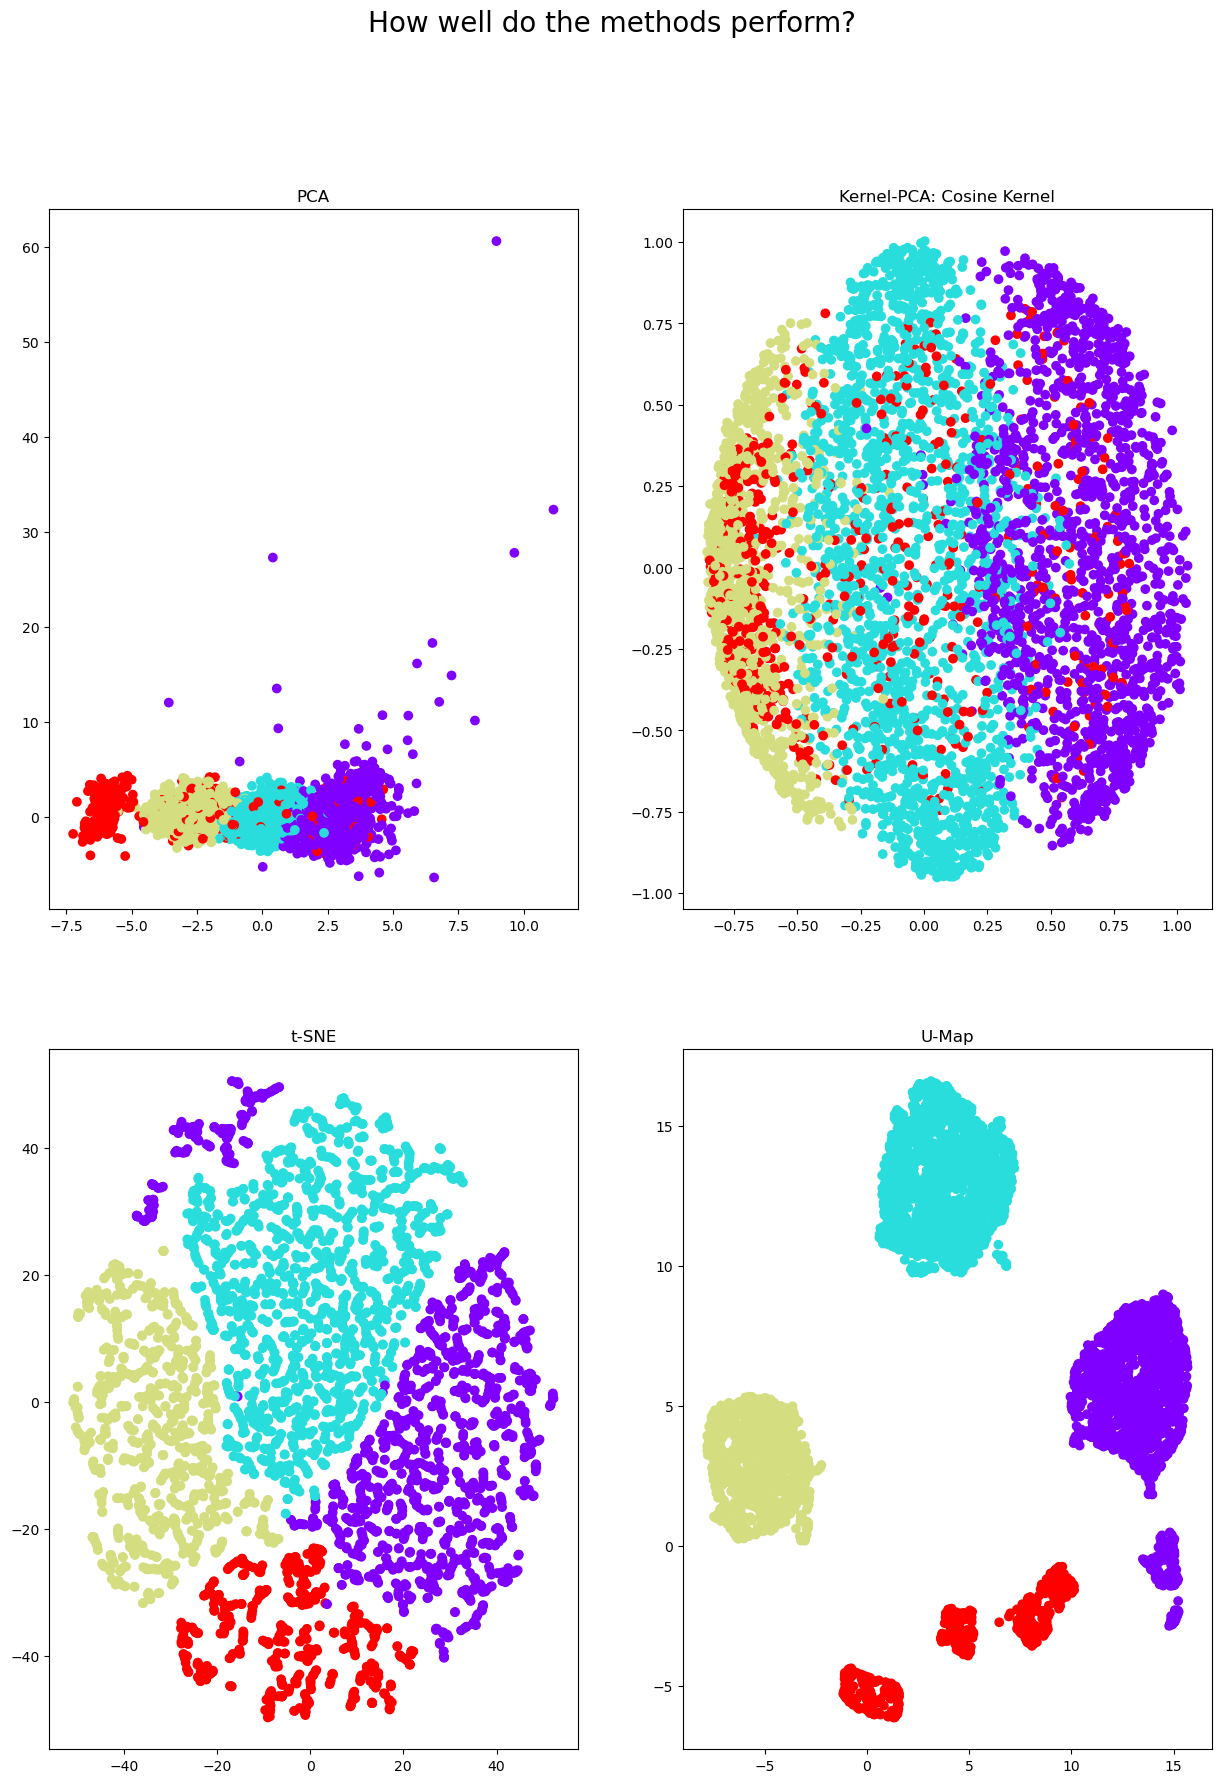

In [118]:
fig, ax = plt.subplots(2, 2, figsize = (15, 20))
ax[0][0].set_title("PCA")

ax[0][0].scatter(df_pcav2["PCA1"], df_pcav2["PCA2"],
            c = df_umap["labels"], cmap = "rainbow")

ax[0][1].set_title("Kernel-PCA: Cosine Kernel")
ax[0][1].scatter(cos_kpca["cos1"], cos_kpca["cos2"],
            c = df_umap["labels"], cmap = "rainbow")


ax[1][0].set_title("t-SNE")
ax[1][0].scatter(df_tsne["t-SNE1"], df_tsne["t-SNE2"],
            c = df_umap["labels"], cmap = "rainbow")


ax[1][1].set_title("U-Map")
ax[1][1].scatter(df_umap["umap1"], df_umap["umap2"],
            c = df_umap["labels"], cmap = "rainbow")


plt.suptitle("How well do the methods perform?", fontsize = 20)
plt.show()

- Based on the plots above, we can see u-map does the best in separating fighters, although there are alot of overlap, indicating that winning and losing isn't the only thing that differentiates fighters

### Clustering

In [102]:
## looks like k = 3 is the best, but we know we want two clusters winners and losers, so we will use 2 instead

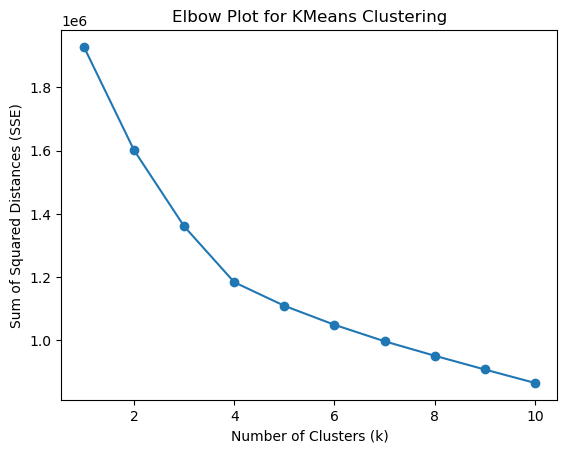

In [177]:
sse = []

# loop over range of k values and perform k-means clustering using umap dataframe
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# plot the elbow plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Plot for KMeans Clustering')
plt.show()

In [104]:
kmeans = KMeans(n_clusters = 4)

In [105]:
kmeans.fit(df_umap.dropna())

KMeans(n_clusters=4)

In [106]:
df_umap["labels"] = kmeans.labels_

In [127]:
df.head()

id  best_streak   elo  tier  tier_elo  average_bet  total_matches  \
0  804            5  1560     1      1559  10870713.45             44   
1  804            5  1560     1      1559  10870713.45             44   
2  804            5  1560     1      1559  10870713.45             44   
3  804            5  1560     1      1559  10870713.45             44   
4  804            5  1560     1      1559  10870713.45             44   

   win_rate  match_format  match_tier  winner_binary  id_other  \
0      0.61             0           1            0.0     803.0   
1      0.61             0           1            0.0     884.0   
2      0.61             0           1            1.0    6375.0   
3      0.61             0           1            1.0     769.0   
4      0.61             0           1            0.0    1490.0   

   best_streak_other  elo_other  tier_other  tier_elo_other  \
0                2.0     1338.0           1          1338.0   
1               14.0     1544.0           1          1433.0   
2               14.0     1702.0           1          1699.0   
3                9.0     1623.0           1          1620.0   
4                6.0     1587.0           1          1586.0   

   average_bet_other  total_matches_other  win_rate_other  
0         4979841.32                 37.0            0.27  
1         4989952.13                 39.0            0.64  
2        18188514.31                 42.0            0.79  
3         8723817.10                 50.0            0.70  
4         7656194.80                 55.0            0.64

In [178]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_scaled)

KMeans(n_clusters=4)

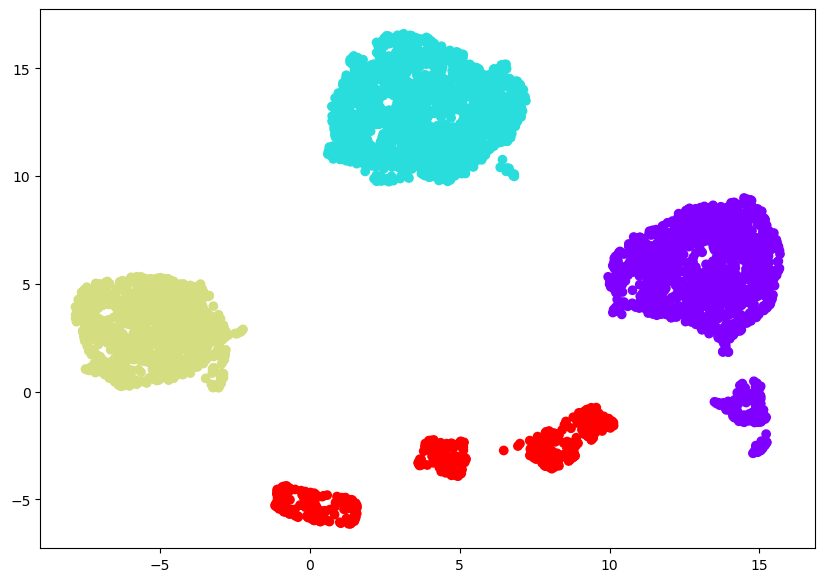

In [107]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.scatter(df_umap["umap1"], df_umap["umap2"], c = df_umap["labels"], cmap = "rainbow")


plt.show()

In [108]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_scaled_sub)

KMeans(n_clusters=2)

In [194]:
cluster_means = df_scaled.groupby(kmeans.labels_).mean()


In [195]:
feature_importance = pd.DataFrame(cluster_means.diff().abs().sum(axis=0))


In [196]:
feature_importance.rename(columns = {0: "Mean"}, inplace = True)

In [197]:
feature_importance.sort_values(by = ["Mean"], ascending = False, inplace = True)

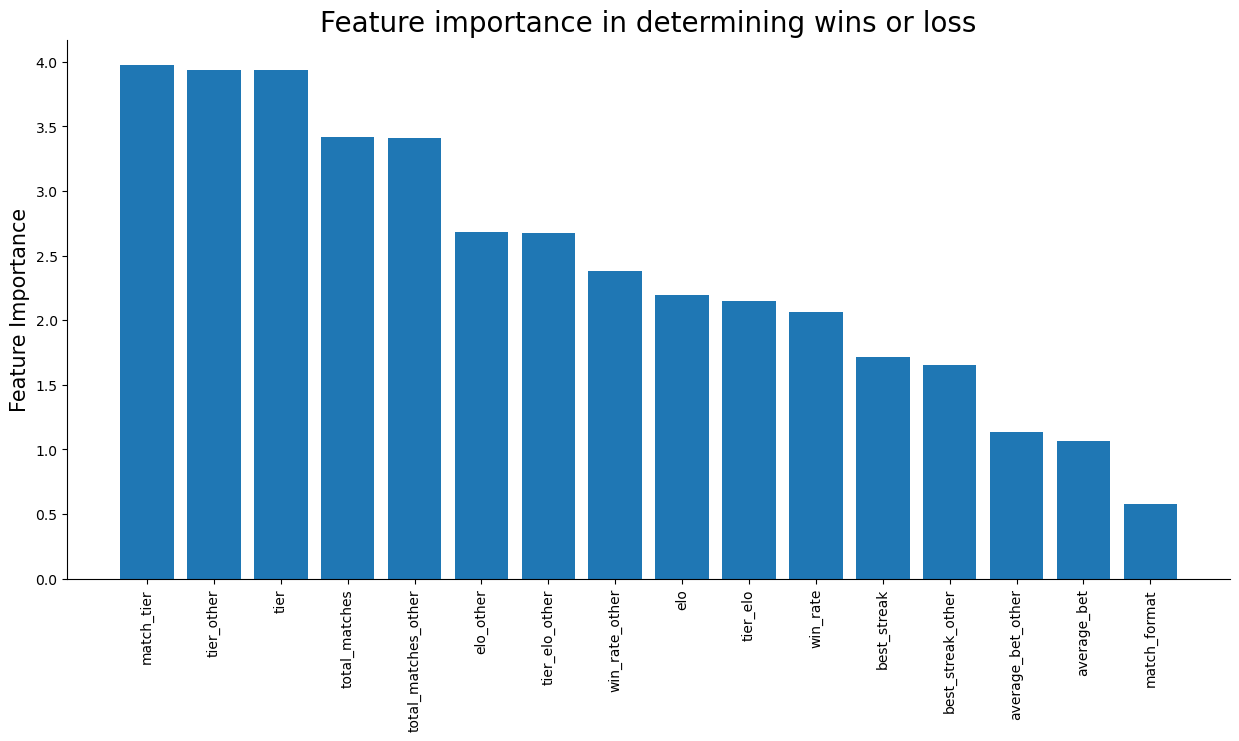

In [198]:
fig, ax = plt.subplots(figsize = (15, 7))

ax.bar(feature_importance.index,feature_importance["Mean"])
ax.set_ylabel("Feature Importance", fontsize = 15)
ax.set_title("Feature importance in determining wins or loss", fontsize = 20)
sns.despine(ax = ax)
plt.xticks(rotation=90)

plt.show()

# Cluster Statistics

In [156]:
len(kmeans.labels_)

120506

In [155]:
len(df_pcav2["PCA2"])

120506

In [ ]:
df_umap.head()

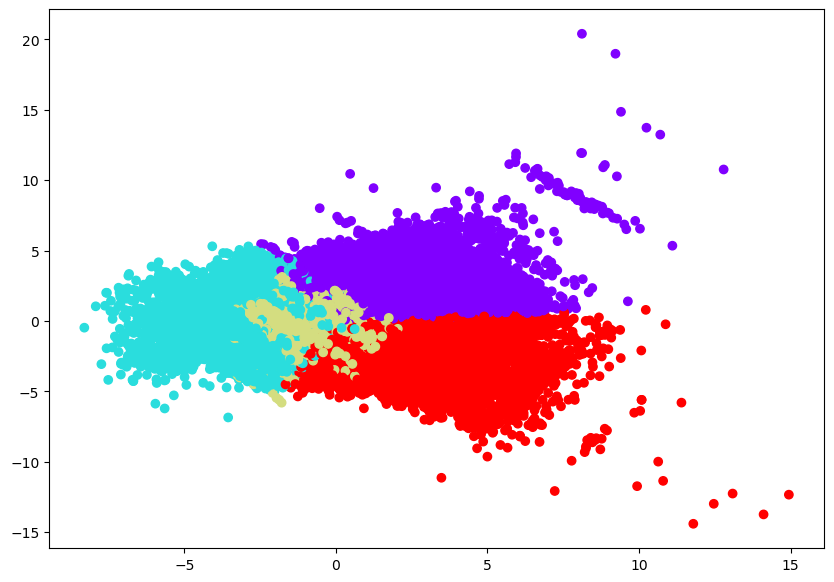

In [201]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.scatter(df_pcav2["PCA1"], df_pcav2["PCA2"], c = kmeans.labels_, cmap = "rainbow")


plt.show()

In [182]:
df['labels'] = kmeans.labels_
df.groupby('labels').mean()

best_streak          elo      tier     tier_elo   average_bet  \
labels                                                                  
0          9.272215  1610.462651  1.500296  1608.148277  1.090900e+07   
1          4.760608  1489.743092  2.999693  1492.067610  5.685703e+06   
2          3.855203  1409.287030  1.588474  1411.840763  5.610748e+06   
3          4.879337  1456.411403  1.521578  1457.730924  6.530625e+06   

        total_matches  win_rate  match_format  match_tier  best_streak_other  \
labels                                                                         
0           47.593571  0.686325      0.143502    1.506884           4.825670   
1           25.825678  0.496631      0.182730    3.009196           4.531681   
2           42.960969  0.390006      0.083242    1.576179           3.945377   
3           44.428562  0.456543      0.138819    1.509714           9.386197   

          elo_other  tier_other  tier_elo_other  average_bet_other  \
labels                                                               
0       1455.973487    1.523681     1457.890488       6.574751e+06   
1       1485.794456    3.016465     1490.127250       5.691835e+06   
2       1412.731282    1.595563     1416.374326       5.680130e+06   
3       1614.191947    1.506207     1611.962931       1.132341e+07   

        total_matches_other  win_rate_other  
labels                                       
0                 44.526579        0.456586  
1                 25.598502        0.489316  
2                 43.213441        0.395572  
3                 47.193735        0.691885

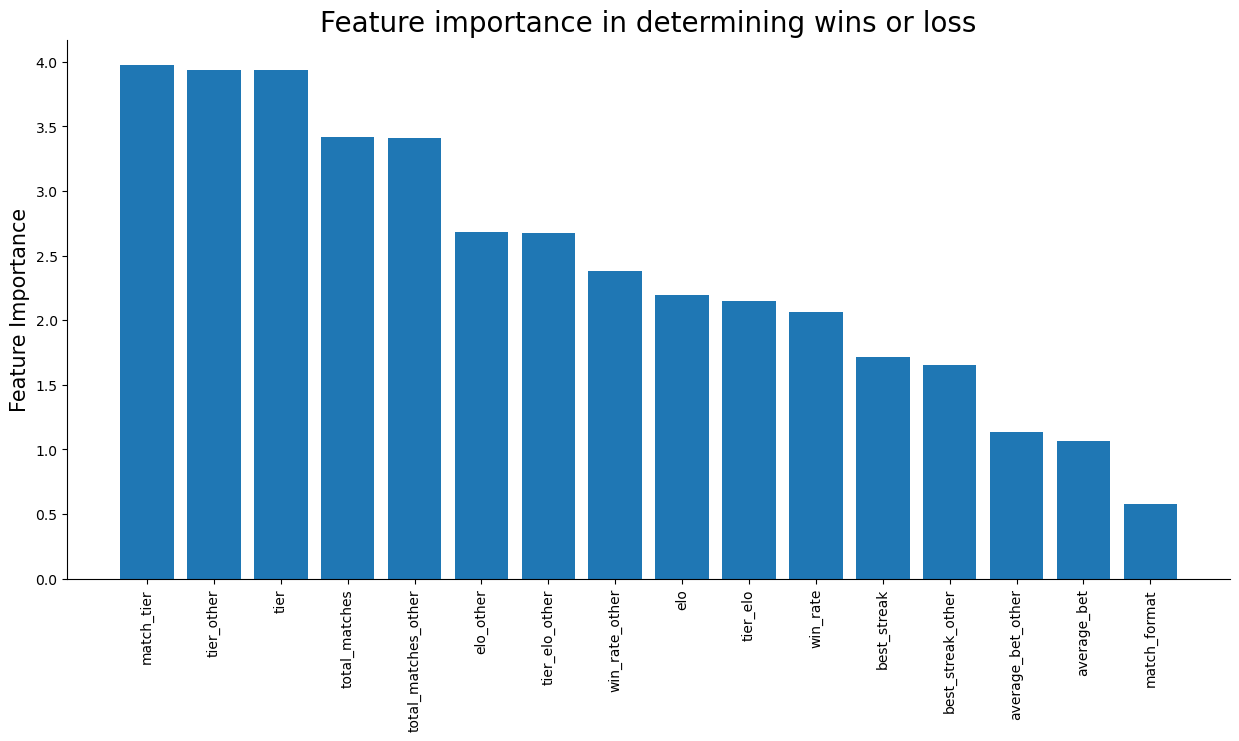

In [199]:
fig, ax = plt.subplots(figsize = (15, 7))

ax.bar(feature_importance.index,feature_importance["Mean"])
ax.set_ylabel("Feature Importance", fontsize = 15)
ax.set_title("Feature importance in determining wins or loss", fontsize = 20)
sns.despine(ax = ax)
plt.xticks(rotation=90)

plt.show()